Fonte: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Subtegrando o conjunto de dados
#Index 11856 marca o final do ano de 2013
df = pd.read_csv(r"C:\Macros\Train_SU63ISt.csv", nrows=11856)

In [3]:
#Criando treino e conjunto de testes 
#Index 10392 marca o final de outubro de 2013 
train = df [0: 10392] 
teste = df [10392:]

In [4]:
teste.head()

,ID,Datetime,Count
10392,10392,01-11-2013 00:00,170
10393,10393,01-11-2013 01:00,156
10394,10394,01-11-2013 02:00,90
10395,10395,01-11-2013 03:00,88
10396,10396,01-11-2013 04:00,54


In [7]:
teste.describe()

,ID,Count
count,1464.00000,1464.000000
mean,11123.50000,149.327869
std,422.76471,77.449724
min,10392.00000,2.000000
25%,10757.75000,88.000000
50%,11123.50000,134.000000
75%,11489.25000,206.500000
max,11855.00000,628.000000


In [5]:
#Agregar o conjunto de dados no nível diário
df.Datetime = pd.to_datetime (df.Datetime, format = '%d-%m-%Y %H:%M') 
df.index = df.Datetime 
df = df.resample ('D'). mean ()
train.Datetime = pd.to_datetime (train.Datetime, format = '%d-%m-%Y %H:%M') 
train.index = train.Datetime 
train = train.resample ('D'). mean () 
teste.Datetime = pd.to_datetime (teste.Datetime, format = '%d-%m-%Y %H:%M') 
teste.index = teste.Datetime 
teste = teste.resample ('D'). mean ()

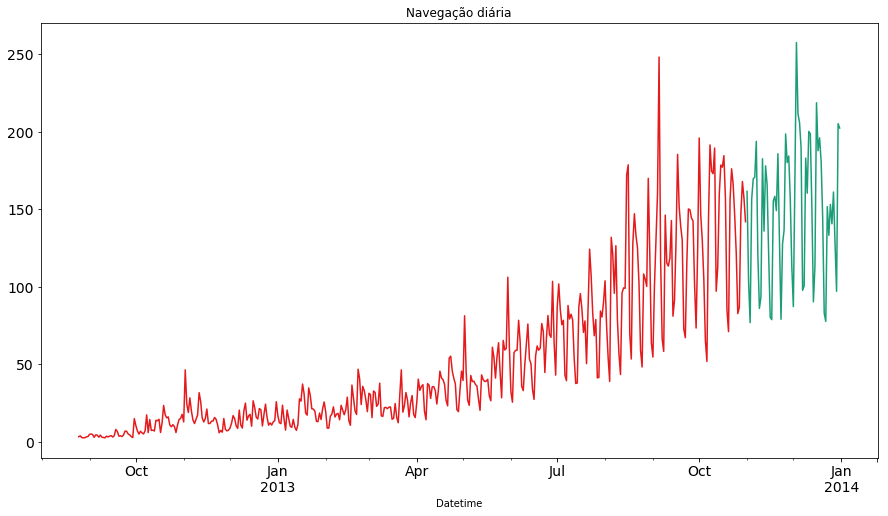

In [6]:
#Plotting data
train.Count.plot (figsize = (15,8), title = 'Navegação diária', fontsize = 14, colormap='Set1')
teste.Count.plot (figsize = (15,8), title = 'Navegação diária', fontsize = 14, colormap='Dark2')

Text(0.5,1,'Previsão Ingênua')

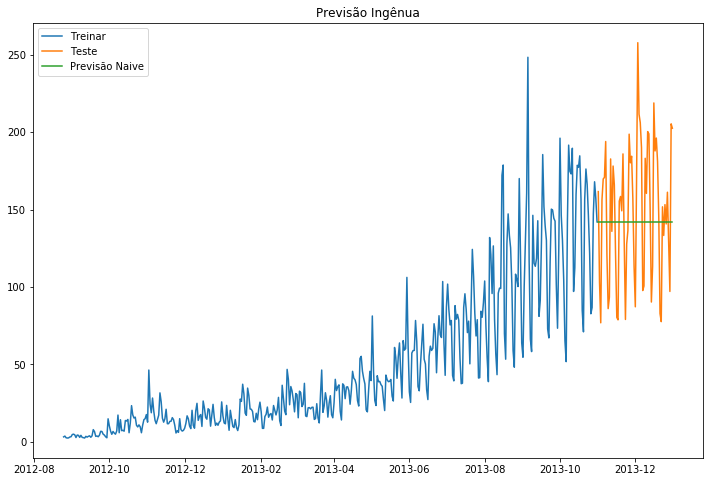

In [7]:
dd = np.asarray (train.Count)
y_hat = teste.copy ()
y_hat ['naive'] = dd [len (dd) -1]
plt.figure (figsize = (12,8))
plt.plot (train.index, train ['Count'], label = 'Treinar', )
plt.plot (teste.index, teste ['Count'], label = 'Teste')
plt.plot (y_hat.index, y_hat ['naive'], label = 'Previsão Naive')
plt.legend (loc = 'best')
plt.title ("Previsão Ingênua")

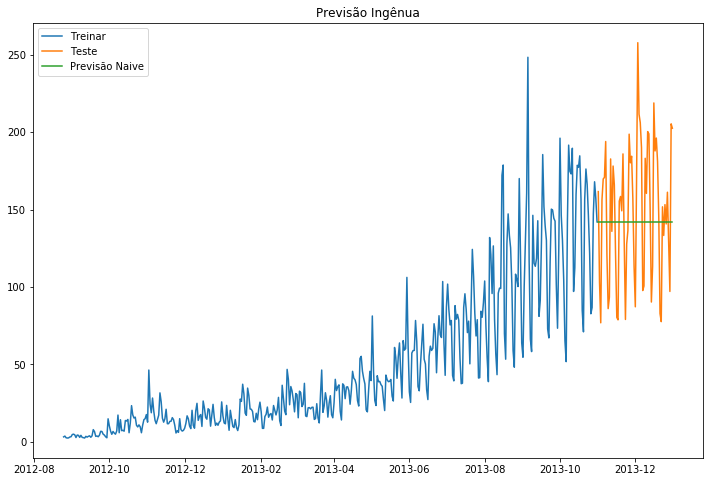

In [8]:
dd = np.asarray (train.Count)
y_hat = teste.copy ()
y_hat ['naive'] = dd [len (dd) -1]
plt.figure (figsize = (12,8))
plt.plot (train.index, train ['Count'], label = 'Treinar')
plt.plot (teste.index, teste ['Count'], label = 'Teste')
plt.plot (y_hat.index, y_hat ['naive'], label = 'Previsão Naive')
plt.legend (loc = 'best')
plt.title ("Previsão Ingênua");

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(teste.Count, y_hat.naive))
print(rms_naive)

43.91640614391676


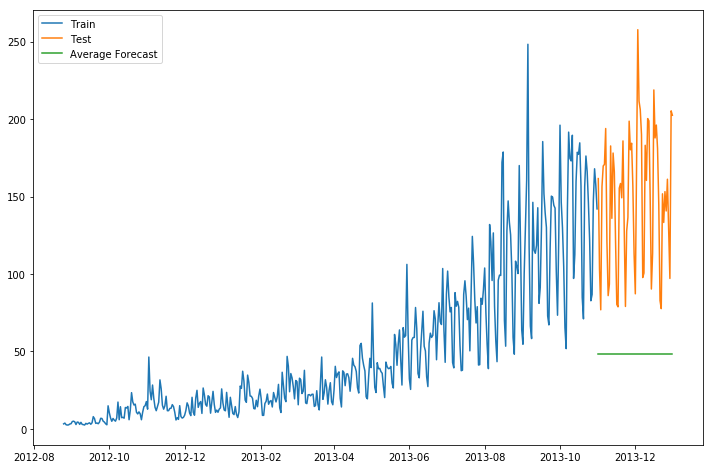

In [10]:
y_hat_avg = teste.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

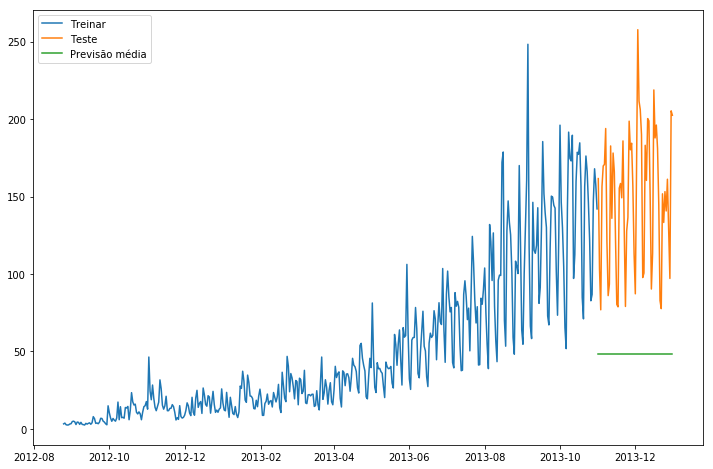

In [11]:
y_hat_avg = teste.copy ()
y_hat_avg ['avg_forecast'] = train ['Count']. mean ()
plt.figure (figsize = (12,8))
plt.plot (train ['Count'], label = 'Treinar')
plt.plot (teste ['Count'], label = 'Teste')
plt.plot (y_hat_avg ['avg_forecast'], label = 'Previsão média')
plt.legend (loc = 'best')

In [12]:
rms_avg_simple = sqrt (mean_squared_error (teste.Count, y_hat_avg.avg_forecast))
print (rms_avg_simple)

109.88526527082863


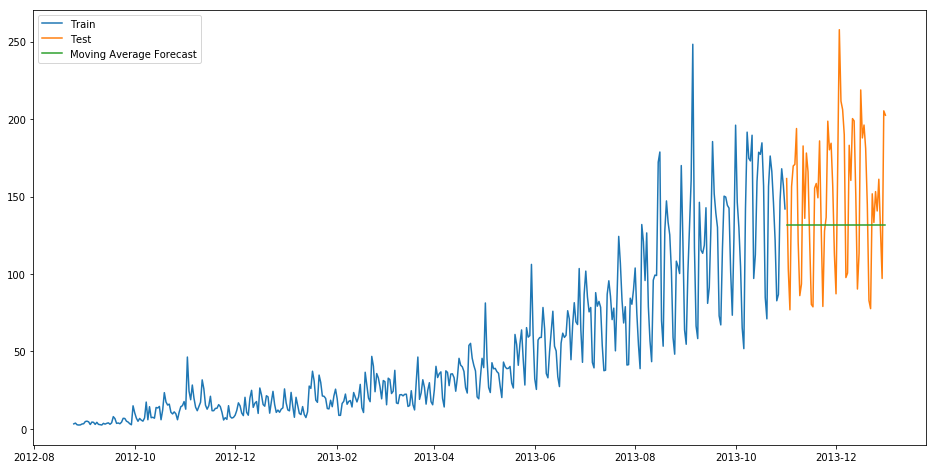

In [13]:
y_hat_avg = teste.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [14]:
rms_avg_moving = sqrt(mean_squared_error(teste.Count, y_hat_avg.moving_avg_forecast))
print(rms_avg_moving)

46.72840725106963


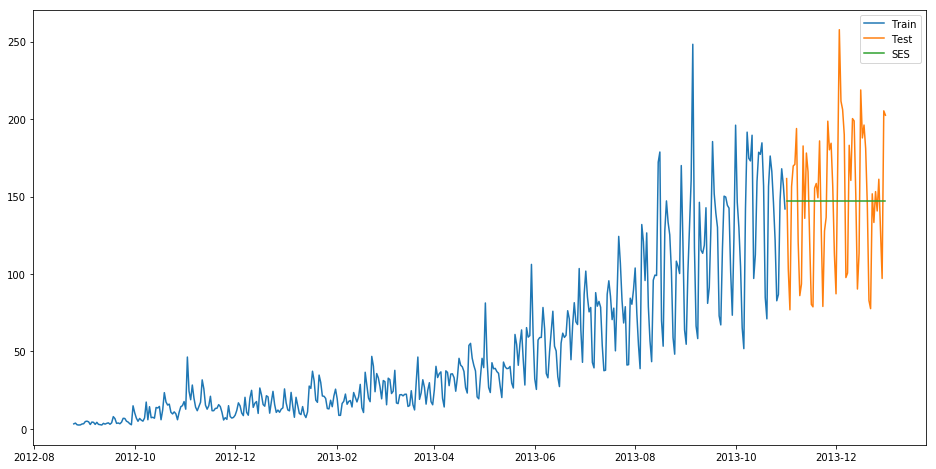

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = teste.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(teste))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [16]:
rms_simple_expon = sqrt(mean_squared_error(teste.Count, y_hat_avg.SES))
print(rms_simple_expon)

43.357625225228155


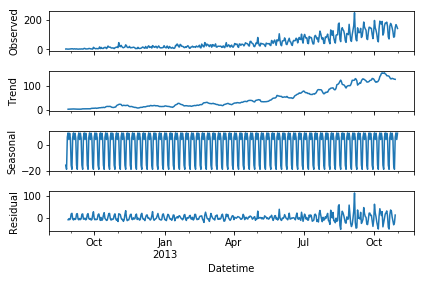

In [17]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)

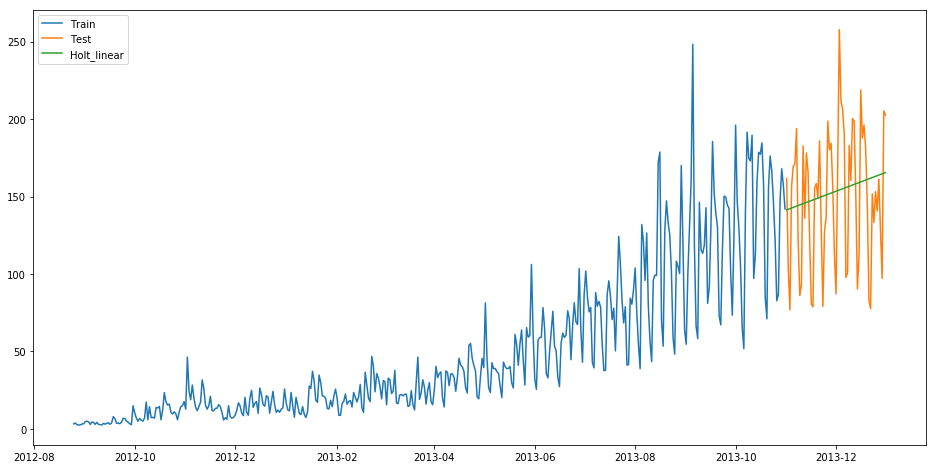

In [18]:
y_hat_avg = teste.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(teste))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')

In [20]:
rms_holt_linear = sqrt(mean_squared_error(teste.Count, y_hat_avg.Holt_linear))
print(rms_holt_linear)

43.056259611507286


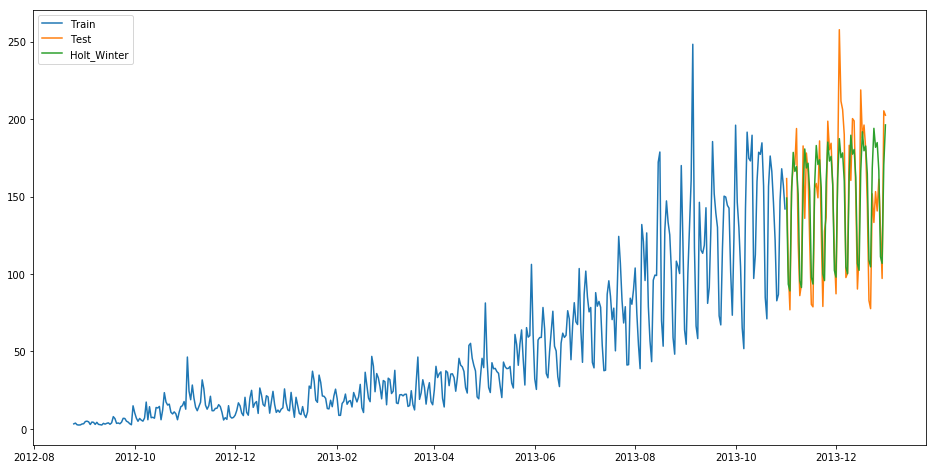

In [21]:
y_hat_avg = teste.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(teste))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [22]:
rms_holt_winter = sqrt(mean_squared_error(teste.Count, y_hat_avg.Holt_Winter))
print(rms_holt_winter)

23.961492566159794


C:\Users\Murilo\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


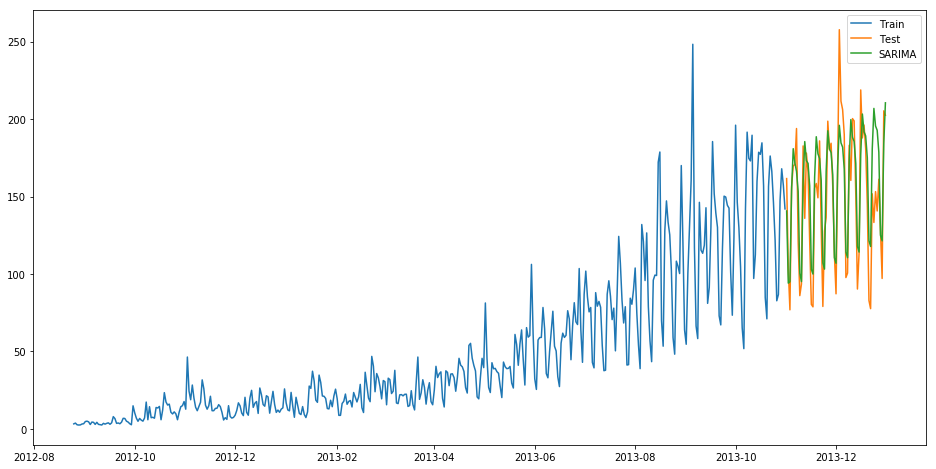

In [23]:
y_hat_avg = teste.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(teste['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')

In [24]:
rms_sarima = sqrt(mean_squared_error(teste.Count, y_hat_avg.SARIMA))
print(rms_sarima)

26.043862696311677


In [25]:
#rms_sarima, #rms_holt_winter, #rms_holt_linear,
#rms_simple_expon, #rms_avg_moving, #rms_avg_simple, #rms_naive

print(f'rms_naive: {rms_naive}\nrms_avg_simple: {rms_avg_simple}\nrms_avg_moving: {rms_avg_moving}\nrms_simple_expon: {rms_simple_expon}\nrms_holt_linear: {rms_holt_linear}\nrms_holt_winter: {rms_holt_winter}\nrms_sarima: {rms_sarima}')

rms_naive: 43.91640614391676
rms_avg_simple: 109.88526527082863
rms_avg_moving: 46.72840725106963
rms_simple_expon: 43.357625225228155
rms_holt_linear: 43.056259611507286
rms_holt_winter: 23.961492566159794
rms_sarima: 26.043862696311677
